<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Víctor Navarro Aránguiz</em><br>

</div>

# Python para Data Science: Proyecto final
*15 de Julio de 2024*

**Fecha de Entrega**: 04 de Agosto de 2024

**Objetivos:**
  - Aplicar los conceptos aprendidos en clases.
  - Realizar el análisis de un dataset de su preferencia.
  - Familiarizarse con el manejo de versiones a través de Git.

**Puntaje Total:** 4 Puntos

**Nombre Estudiante(s)**: `Giuseppe Lavarello`

### Visualización
##### Importe de Paquetes

In [2]:
# Para manipulación de data 
import numpy as np
import pandas as pd
import scipy

# Para visualización de data
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

# Para la normalizacion de la data
from sklearn.preprocessing import MinMaxScaler

sns.set_theme()

In [3]:
df0 = pd.read_csv(r'..\data\interim\wine_inter02.csv',index_col=0)

In [4]:
df0.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,fixed_sulfur_dioxide
0,7.0,0.27,0.36,13.0,0.045,45.0,170.0,0.9978,3.01,0.45,8.8,6,125.0
1,6.3,0.30,0.34,1.6,0.049,15.0,132.0,0.9940,3.30,0.49,9.5,6,117.0
2,8.0,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,67.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,139.0
4,6.2,0.32,0.22,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,106.0


##### Distribución de las features

In [ ]:
def feat_plot(feature):
    fig, ax= plt.subplots(1, 2, figsize=(6, 3))
    sns.histplot(feature,ax=ax[0])
    sns.boxplot(feature,ax=ax[1], orient="h")


In [ ]:
num_feat = df0.select_dtypes(exclude = 'object').drop(columns="quality")

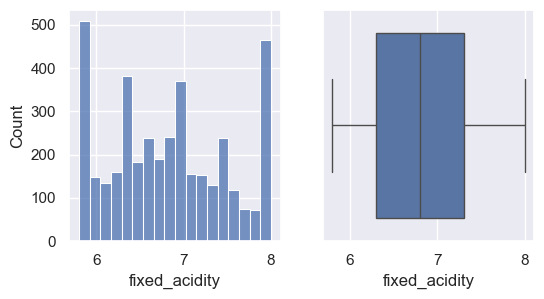

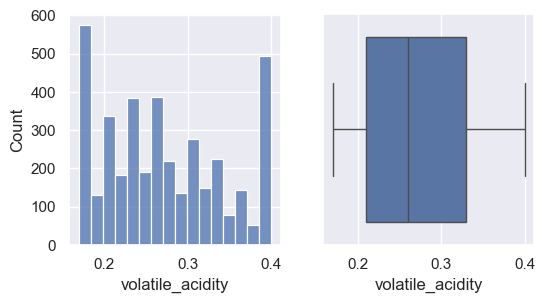

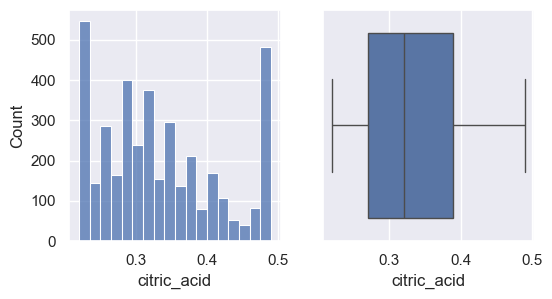

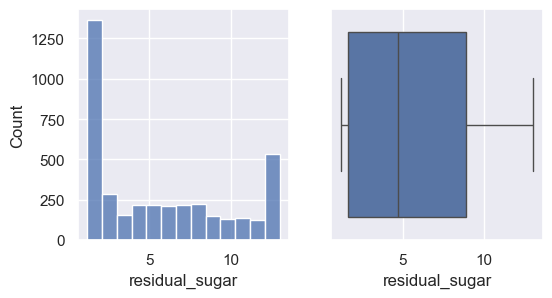

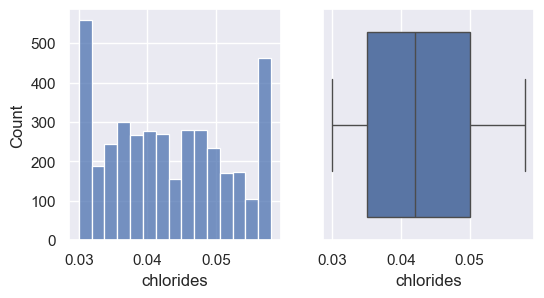

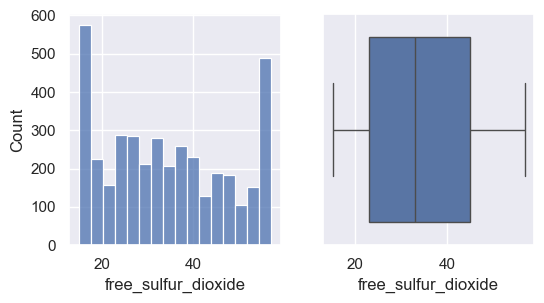

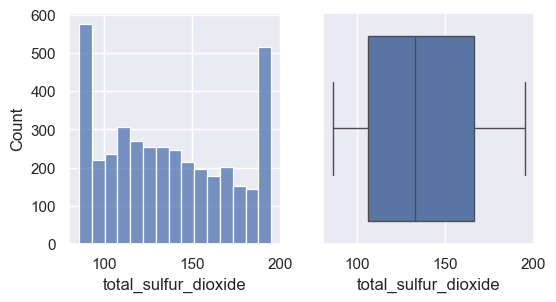

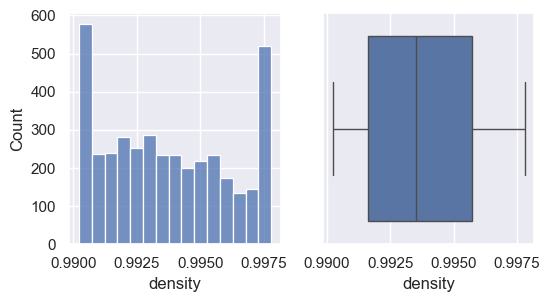

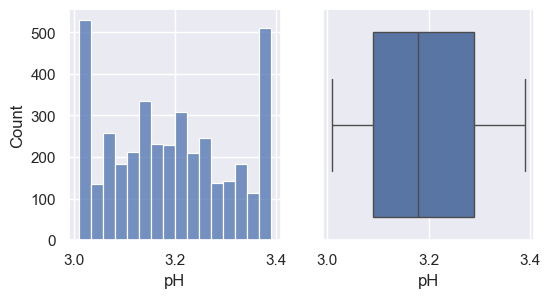

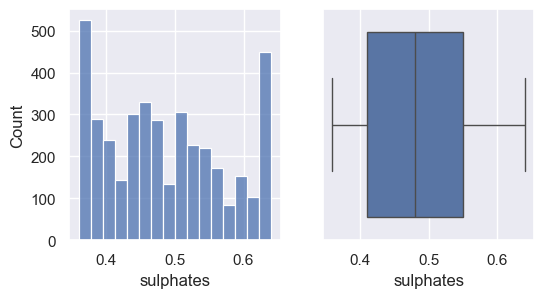

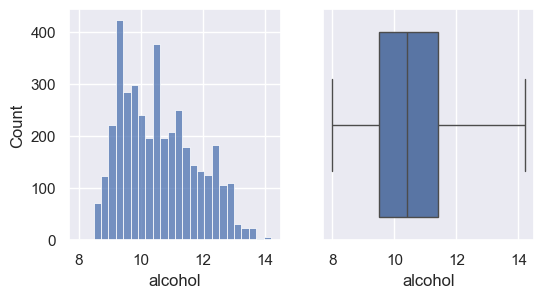

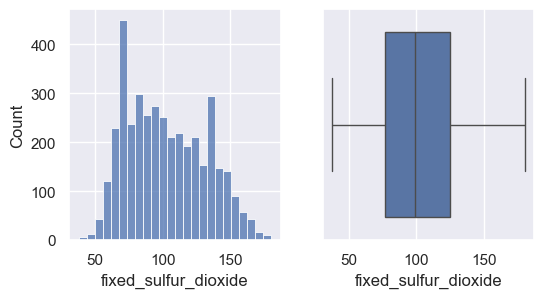

In [ ]:
for i in num_feat.columns:
    feat_plot(num_feat[i])

##### Correlacion y tendencia de la data

Se puede ver que para la variable `quality` presenta muy poca correlacion directa con la mayoria de las variables, lo cual se deja aun mas en claro con los graficos de Impacto

<Axes: >

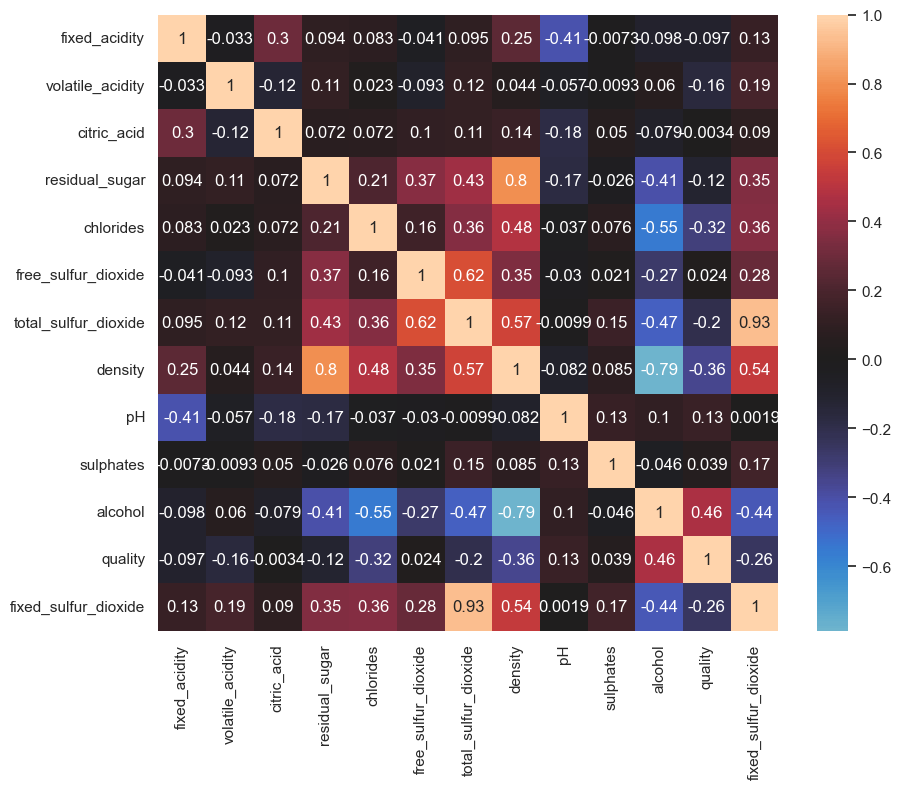

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df0.corr(), annot=True, center=0)

In [5]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df0)

# Creamos un df con la data normalizada
df0_normalized = pd.DataFrame(normalized_data, columns=df0.columns)

##### Impacto de las features sobre la variable `quality`.
- Features de impacto no linear


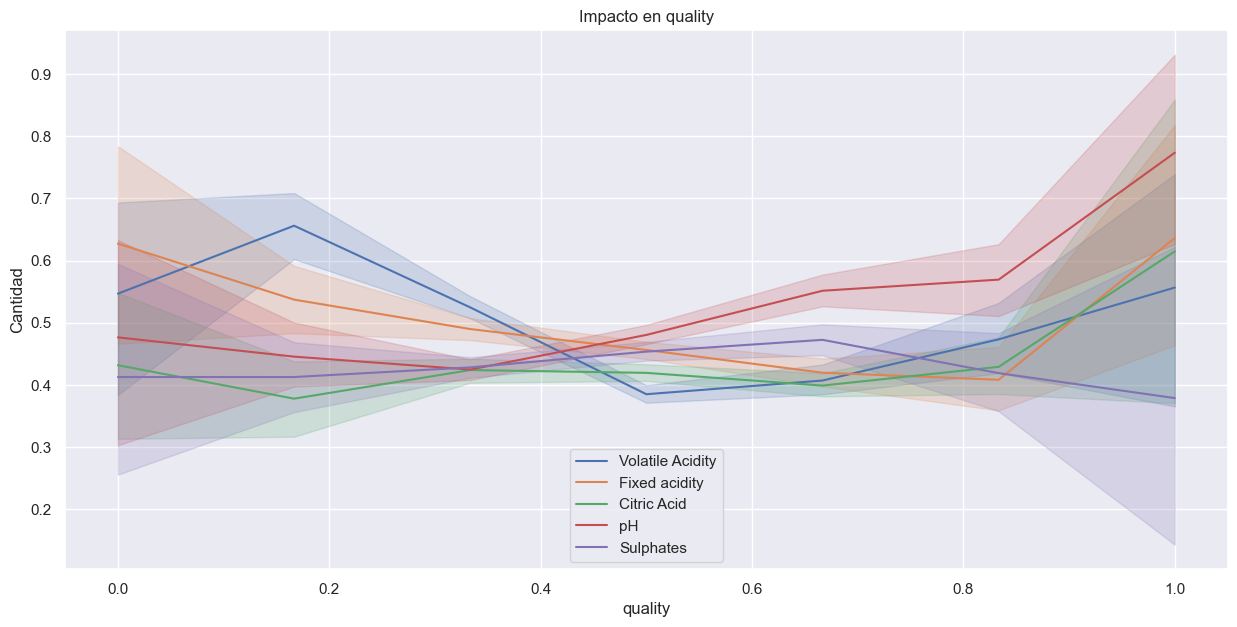

In [22]:
# Se grafican el efecto de las siguientes columnas ["volatile_acidity","citric_acid","chlorides","pH","density","sulphates"]
plt.figure(figsize=(15,7))

sns.lineplot(data=df0_normalized, x="quality",y="volatile_acidity",label="Volatile Acidity")
sns.lineplot(data=df0_normalized, x="quality",y="fixed_acidity",label="Fixed acidity")
sns.lineplot(data=df0_normalized, x="quality",y="citric_acid",label="Citric Acid")
sns.lineplot(data=df0_normalized, x="quality",y="sulphates",label="Sulphates")

plt.ylabel("Cantidad")
plt.title("Impacto en quality")
plt.legend()
plt.show()

- Features de impacto positivo

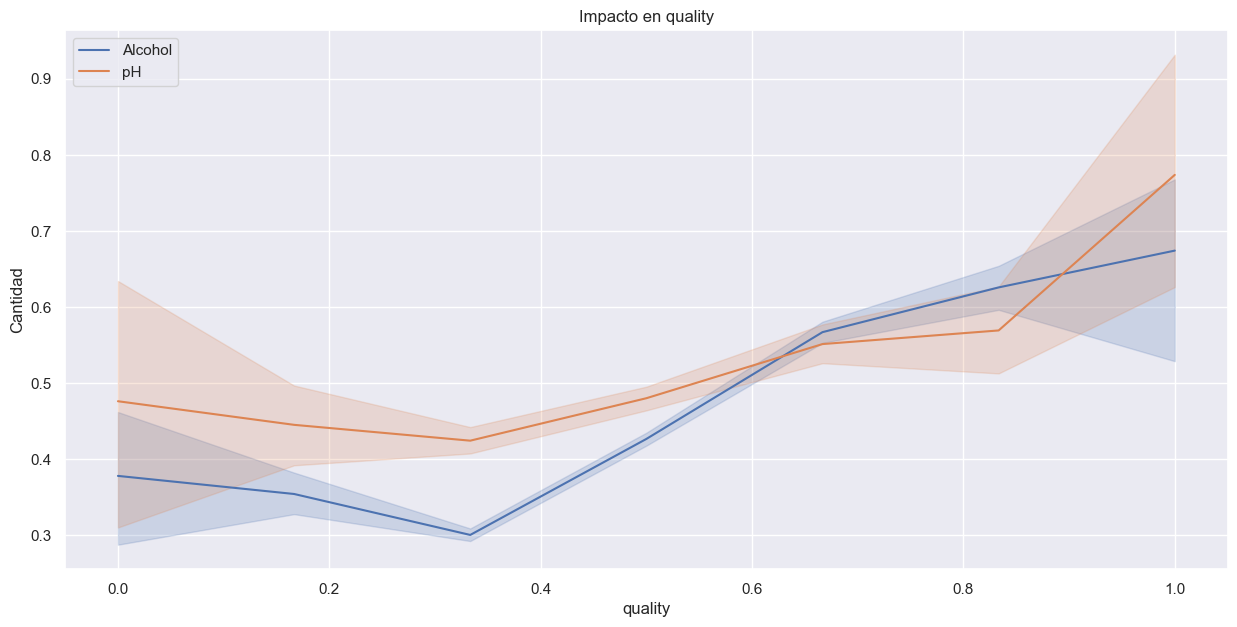

In [23]:
# Se grafican el efecto de las siguientes columnas ["volatile_acidity","citric_acid","chlorides","pH","density","sulphates"]
plt.figure(figsize=(15,7))

sns.lineplot(data=df0_normalized, x="quality",y="alcohol",label="Alcohol")
sns.lineplot(data=df0_normalized, x="quality",y="pH",label="pH")

plt.ylabel("Cantidad")
plt.title("Impacto en quality")
plt.legend()
plt.show()

- Features de impacto negativo

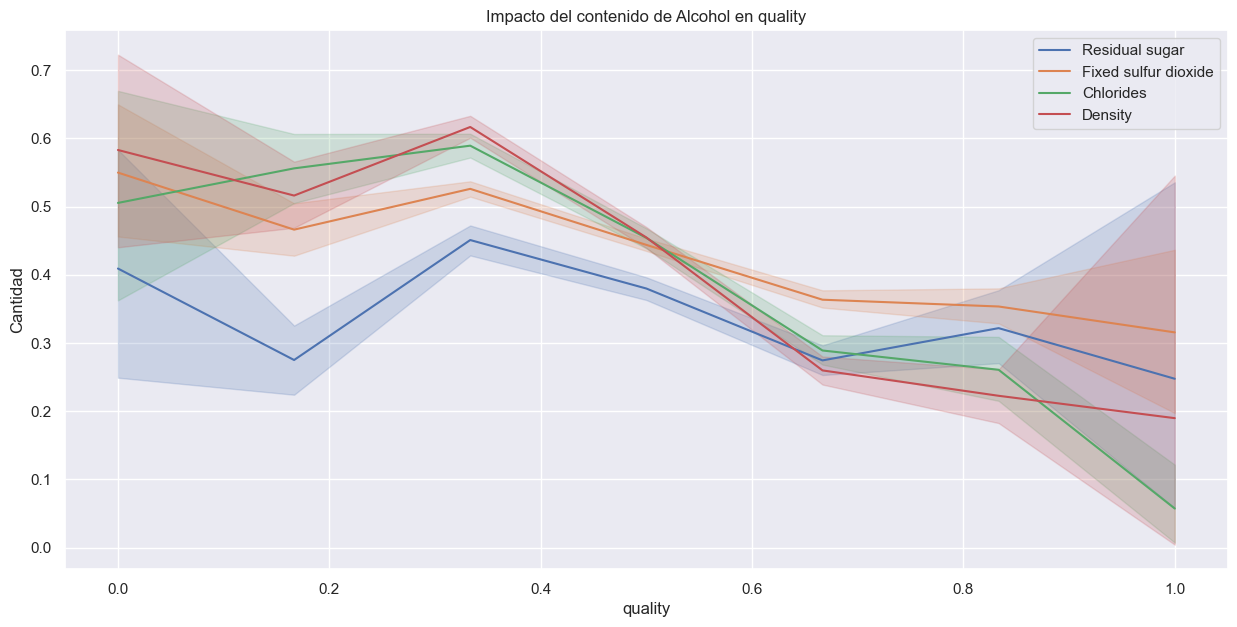

In [19]:
plt.figure(figsize=(15,7))

sns.lineplot(data=df0_normalized, x="quality",y="residual_sugar",label="Residual sugar")
sns.lineplot(data=df0_normalized, x="quality",y="fixed_sulfur_dioxide",label="Fixed sulfur dioxide")
sns.lineplot(data=df0_normalized, x="quality",y="chlorides",label="Chlorides")
sns.lineplot(data=df0_normalized, x="quality",y="density",label="Density")

plt.ylabel("Cantidad")
plt.title("Impacto del contenido de Alcohol en quality")
plt.legend()
plt.show()